In [2]:
# Import libraries
import pandas as pd
from pymongo import MongoClient
from pprint import pprint
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the json file
mongo = MongoClient(port=27017)

In [4]:
# Database names for king-bachman database
print(mongo.list_database_names())

['admin', 'config', 'king-bachman', 'local', 'samplesjson', 'uk_food']


In [5]:
# Assign our database to a variable
db = mongo['king-bachman']

In [6]:
# List the names of the collections in the database
print(db.list_collection_names())

['king-bachman']


In [7]:
# Review a document in the database
pprint(db['king-bachman'].find_one())

{'_id': ObjectId('64b9f6b3a2229c0ebe08e301'),
 'accessInfo': {'accessViewStatus': 'SAMPLE',
                'country': 'US',
                'embeddable': True,
                'epub': {'isAvailable': False},
                'pdf': {'isAvailable': False},
                'publicDomain': False,
                'quoteSharingAllowed': False,
                'textToSpeechPermission': 'ALLOWED_FOR_ACCESSIBILITY',
                'viewability': 'PARTIAL',
                'webReaderLink': 'http://play.google.com/books/reader?id=iCWgDwAAQBAJ&hl=&source=gbs_api'},
 'etag': 'Y6JuzomXmI0',
 'id': 'iCWgDwAAQBAJ',
 'kind': 'books#volume',
 'saleInfo': {'country': 'US', 'isEbook': False, 'saleability': 'NOT_FOR_SALE'},
 'searchInfo': {'textSnippet': 'Readers of Stephen King know that Derry, '
                               'Maine, is a place with a deep, dark hold on '
                               'the author. It reappears in many of his books, '
                               'including Bag of Bo

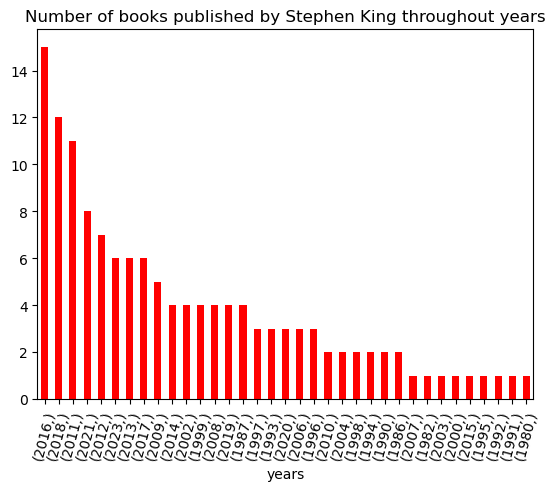

In [56]:
# so we made an empty and named it publish_dates
publish_dates = []
# now we are got itiertae over evey single record in the database
for x in db['king-bachman'].find({}):
    #so we are trying to go through each record that has the author as Stephen King and a published date which we then split off (-) the year value
    # if there is no published date it does nothing 
    try:
        if 'Stephen King' in x['volumeInfo']['authors']:
            publish_dates.append(x['volumeInfo']['publishedDate'].split('-')[0])
    except:
        pass



pd.DataFrame({'years': publish_dates}).value_counts().plot(kind='bar', rot=75, color='r', title= "Number of books published by Stephen King throughout years")



In [66]:


#now make a line chart

import json
# pd.DataFrame({x:publish_dates.count(x) for x in publish_dates}.items(), columns=['year', 'books published']).set_index('year').sort_index().plot(kind='line', color='r', title= "Number of books published by Stephen King")
df = pd.DataFrame({x:publish_dates.count(x) for x in publish_dates}.items(), columns=['year', 'books_published'])
years = [x for x in df['year']]
years.sort()

with open('publish_dates.json', 'w') as f:
    json.dump({int(x): df[df['year'] == x]['books_published'].tolist()[0] for x in years}, f)
# pd.DataFrame({x:publish_dates.count(x) for x in publish_dates}.items(), columns=['year', 'books published']).to_json('author_dates.json')
# data = {x:publish_dates.count(x) for x in publish_dates}
# data
# pd.DataFrame({'years': publish_dates})

In [55]:
king_dates = []
bachman_dates = []
other_dates = []
for x in db['king-bachman'].find({}):
    # made three empty lists so that as we are filtering through book that have authors of Stephen King, Richard Bachman or other 
    #so we are trying to go through each record that has a published date we then split off (-) the year value
    # if there is no published date it does nothing 
    try:
        if 'Stephen King' in x['volumeInfo']['authors']:
            king_dates.append(int(x['volumeInfo']['publishedDate'].split('-')[0]))
        elif 'Richard Bachman' in x['volumeInfo']['authors']:
            bachman_dates.append(int(x['volumeInfo']['publishedDate'].split('-')[0]))
        else:
            other_dates.append(int(x['volumeInfo']['publishedDate'].split('-')[0]))

    except:
        pass

import json

data = {
        'king': king_dates,
        'bachman': bachman_dates,
        'other': other_dates,
    }
with open('author_dates.json', 'w') as f:
    json.dump(data, f)
 





In [46]:
#pd.DataFrame({x:publish_dates.count(x) for x in publish_dates}.items(), columns=['year', 'count']).set_index('year').sort_index().plot(kind='line')
data = []
for x in db['king-bachman'].find({}):
    try:
        if 'Stephen King' in x['volumeInfo']['authors']:
            data.append(('Stephen King', int(x['volumeInfo']['publishedDate'].split('-')[0]), "green"))
        elif 'Richard Bachman' in x['volumeInfo']['authors']:
            data.append(('Richard Bachman', int(x['volumeInfo']['publishedDate'].split('-')[0]), "blue"))
        else:
            data.append(('Other', int(x['volumeInfo']['publishedDate'].split('-')[0]), "red"))
    except:
        pass
df = pd.DataFrame(data, columns=['name', 'year', 'color'])
df

,name,year,color
0,Stephen King,2019,green
1,Stephen King,2011,green
2,Stephen King,1991,green
3,Stephen King,2017,green
4,Stephen King,2017,green
...,...,...,...
167,Richard Bachman,1998,blue
168,Other,2025,red
169,Richard Bachman,1997,blue
170,Richard Bachman,2013,blue


In [31]:
df['year'].min()

1977

In [32]:
df['year'].max()


2025

In [34]:
x = [x for x in range(1977, 2026)]
x

[1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025]

C:\Users\seste\AppData\Local\Temp\ipykernel_4496\27772861.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.set_index('name').plot(x='year', y={'year':'count'},kind='scatter')


<Axes: xlabel='year', ylabel="{'year': 'count'}">

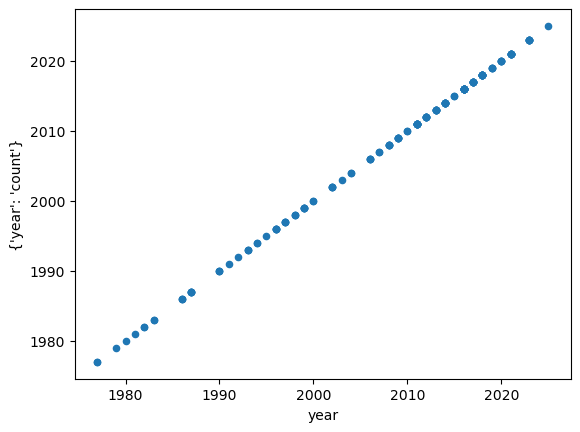

In [48]:
df.set_index('name').plot(x='year', y={'year':'count'},kind='scatter')


name
Other              Axes(0.125,0.11;0.775x0.77)
Richard Bachman    Axes(0.125,0.11;0.775x0.77)
Stephen King       Axes(0.125,0.11;0.775x0.77)
dtype: object

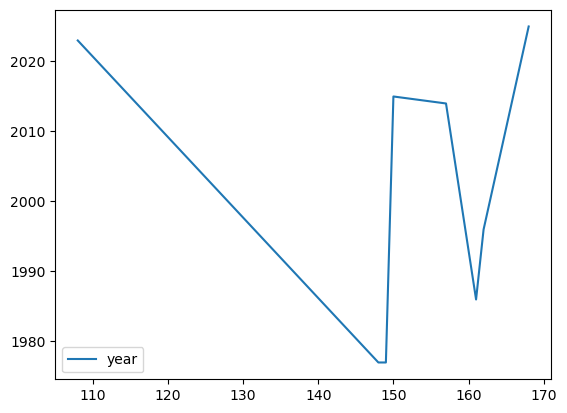

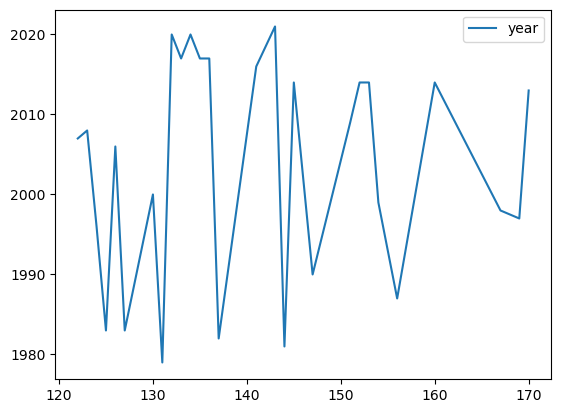

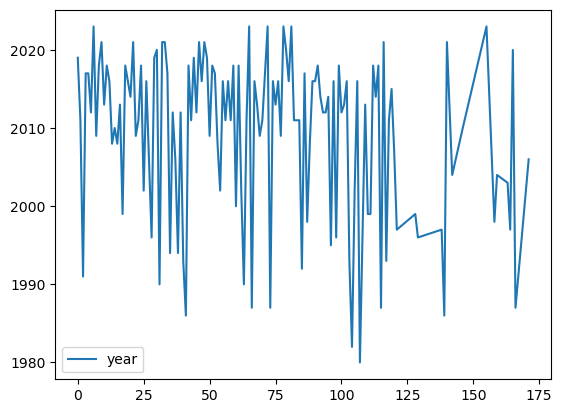

In [23]:
df.groupby(['name']).plot()

fig,


In [ ]:
#let us try to make a scatter plot with the reviews of books by Stephen King 
# so we made an empty and named it publish_dates
rates_books = []
# now we are got itiertae over evey single record in the database
for x in db['king-bachman'].find({}):
    #so we are trying to go through each record that has the author as Stephen King and a published date which we then split off (-) the year value
    # if there is no published date it does nothing 
    try:
        if 'Stephen King' in x['volumeInfo']['authors']:
            publish_dates.append(x['volumeInfo']['averageRating'].split('-')[0])
    except:
        pass